# Hands-on Data Science with python
Using pandas and scikit-learn for classification tasks

## About me
<table cellspacing="0" cellpadding="0">
  <tr>
    <td>
        Diego Alves <br />
        Software Engineer<br />
        <link rel="stylesheet" href="//maxcdn.bootstrapcdn.com/font-awesome/4.3.0/css/font-awesome.min.css">
        <i class="fa fa-google"></i> &nbsp; <a href="mailto:diegocardalves@gmail.com">Email</a><br />
        <i class="fa fa-linkedin"></i> &nbsp; <a href="https://www.linkedin.com/in/diegocardosoalves">LinkedIn</a><br />
        <i class="fa fa-github fa-lg"></i> &nbsp; <a href="https://github.com/diegoca80/datascience">Github</a><br />
    </td>
    <td>
        <a href="https://www.linkedin.com/in/diegocardosoalves" target="_blank"><img src="http://i67.tinypic.com/1jn605.png" border="0" alt="Diego Alves"></a>
    </td>
  </tr>
</table>


## Getting Started


```bash
git clone git@github.com:diegoca80/hands-on-data-science.git
cd hands-on-data-science
pip install -r requirements.txt
```

## Overview

* Hitting the highlights
* Pandas for Data Wrangling
  * Overview
  * Reading data
  * Exploration
  * GroupBy
  * Plotting
  * Advanced Indexing
* Scikit-Learn for Classification
  * Preprocessing
  * k-Nearest Neighbors
  * Decision Trees
  * Support Vector Machines

### Common Imports

In [1]:
import os
import numpy as np
import pandas as pd

## Notebook Specifics

In [2]:
%matplotlib inline
pd.set_option("max_rows", 10)

## Pretty Graphs

In [3]:
from seaborn import set_style
set_style("darkgrid")
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas for Data Wrangling

## What is Pandas?
Pandas is by far my favorite preprocessing tool. It's a data wrangling/modeling/analysis tool that is similar to R and Excel; in fact, the DataFrame data structure in Pandas was named after the DataFrame in R. Pandas comes with several easy-to-use data structures.
I'll also be covering a bunch of different wrangling tools, as well as a couple of analysis tools.

## Why Pandas?
So, why would you want to use Python, as opposed to tools like R and Excel? I like to use it because I like to keep everything in Python, from start to finish. It just makes it easier if I don't have to switch back and forth between other tools. Also, if I have to build in preprocessing as part of a production system, it makes sense to just do it in Python from the beginning.

Pandas is great for preprocessing, as we'll see, and it can be easily combined with other modules from the scientific Python stack.

## About the Data

Here is the set of variables contained in the data.
<ul>
  <li>age – The age of the individual</li>
  <li>work_class – The type of employer the individual has. Whether they are government, military, private, an d so on.</li>
  <li>education – The highest level of education achieved for that individual</li>
  <li>education_num – Highest level of education in numerical form</li>
  <li>marital_status – Marital status of the individual</li>
  <li>occupation – The occupation of the individual</li>
  <li>relationship – Contains family relationship values like husband, father, and so on, but only contains one per observation.</li>
  <li>race – descriptions of the individuals race. Black, White, Eskimo, and so on</li>
  <li>sex – Biological Sex</li>
  <li>hours_per_week – Hours worked per week</li>
  <li>native_country – Country of origin for person</li>
  <li>fifty_k –  Value of income to be trained and predicted</li>
</ul>

## Reading Data

In [4]:
dta = pd.read_csv("data/dataset.csv")

## Explore the Data

In [5]:
dta.head()

,age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,fifty_k
0,47,Private,10th,6,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,45,United-States,<=50K
1,40,Private,10th,6,Divorced,Craft-repair,Not-in-family,Amer-Indian-Eskimo,Male,40,United-States,<=50K
2,30,Private,10th,6,Divorced,Other-service,Not-in-family,Amer-Indian-Eskimo,Male,40,United-States,<=50K
3,27,Private,10th,6,Divorced,Transport-moving,Not-in-family,Amer-Indian-Eskimo,Male,75,United-States,<=50K
4,38,Private,10th,6,Divorced,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Female,40,Portugal,<=50K


In [6]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 12 columns):
age               30162 non-null int64
work_class        30162 non-null object
education         30162 non-null object
education_num     30162 non-null int64
marital_status    30162 non-null object
occupation        30162 non-null object
relationship      30162 non-null object
race              30162 non-null object
sex               30162 non-null object
hours_per_week    30162 non-null int64
native_country    30162 non-null object
fifty_k           30162 non-null object
dtypes: int64(3), object(9)
memory usage: 1.7+ MB


In [7]:
dta.describe()

,age,education_num,hours_per_week
count,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,40.931238
std,13.134665,2.549995,11.979984
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,47.000000,13.000000,45.000000
max,90.000000,16.000000,99.000000


## Pandas Orientation

### Indices

In [8]:
dta.index

RangeIndex(start=0, stop=30162, step=1)

In [9]:
dta.columns

Index(['age', 'work_class', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'hours_per_week',
       'native_country', 'fifty_k'],
      dtype='object')

#### Selecting Indexes

In [180]:
dta.ix[[5, 10, 15]]

,age,work_class,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,fifty_k
5,54,Self-emp-not-inc,10th,6,Divorced,Other-service,Not-in-family,Black,Female,10,United-States,<=50K
10,59,Private,10th,6,Divorced,Adm-clerical,Not-in-family,Black,Female,40,United-States,<=50K
15,58,Private,10th,6,Divorced,Transport-moving,Not-in-family,Black,Male,50,United-States,<=50K


#### Selecting Columns

In [181]:
dta[["work_class", "education"]]

,work_class,education
0,Private,10th
1,Private,10th
2,Private,10th
3,Private,10th
4,Private,10th
...,...,...
30157,Private,Some-college
30158,Private,Some-college
30159,Self-emp-inc,Some-college
30160,Local-gov,Some-college


#### Rows and Columns

In [182]:
dta.ix[[5, 10, 15], ["work_class", "education"]]

,work_class,education
5,Self-emp-not-inc,10th
10,Private,10th
15,Private,10th


## GroupBy Operation

In [183]:
dta.groupby("fifty_k").education.describe()

fifty_k        
<=50K    count         22654
         unique           16
         top         HS-grad
         freq           8223
>50K     count          7508
         unique           15
         top       Bachelors
         freq           2126
Name: education, dtype: object

## Plotting

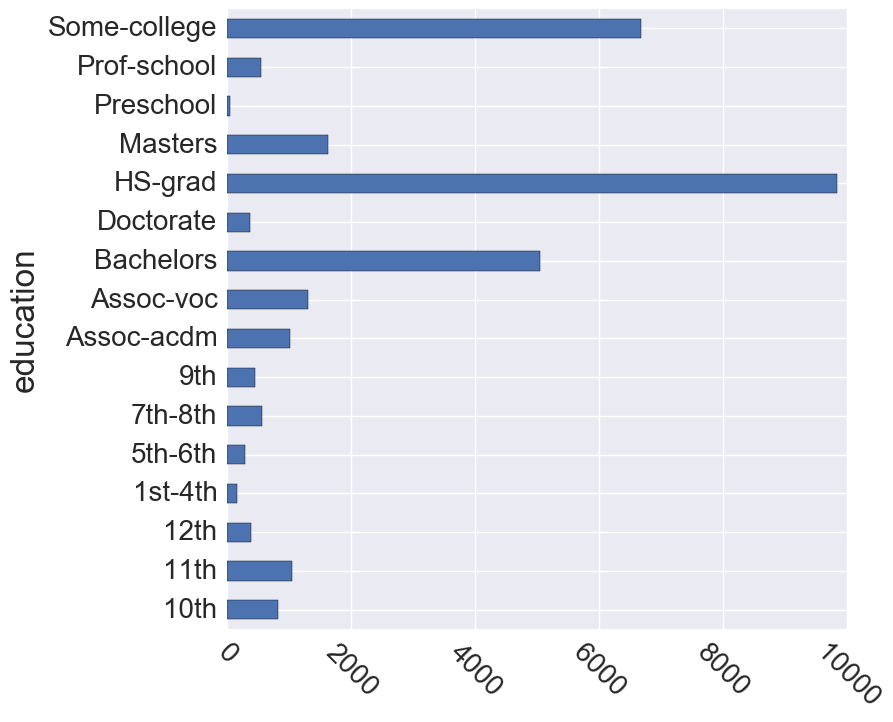

In [184]:
ax = dta.groupby("education").size().plot(kind="barh", figsize=(8, 8))

# ax.set_xticklabels([])  # turn off x tick labels

# resize y label
ylabel = ax.yaxis.get_label()
ylabel.set_fontsize(24)

# resize x tick labels
labels = ax.yaxis.get_ticklabels()
[label.set_fontsize(20) for label in labels];

# resize y tick labels
labels = ax.xaxis.get_ticklabels()
[label.set_fontsize(20) for label in labels]
[label.set_rotation(-45) for label in labels];

### Seaborn

In [185]:
import seaborn as sns

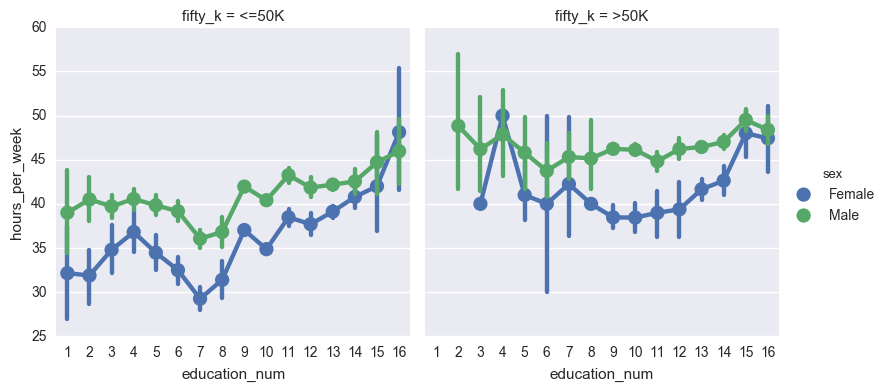

In [186]:
g = sns.factorplot("education_num", "hours_per_week", hue="sex", col="fifty_k", data=dta)

### Deleting Columns

In [187]:
del dta["education"]

### Advanced Indexing

#### Indexing with Booleans

In [188]:
dta.education_num <= 8

0         True
1         True
2         True
3         True
4         True
         ...  
30157    False
30158    False
30159    False
30160    False
30161    False
Name: education_num, dtype: bool

In [189]:
dta.ix[dta.education_num <= 8, "education_num"]

0        6
1        6
2        6
3        6
4        6
        ..
22937    1
22938    1
22939    1
22940    1
22941    1
Name: education_num, dtype: int64

#### Slicing with labels (!)

In [190]:
dta.groupby("work_class").age.mean()

work_class
Federal-gov         42.577943
Local-gov           41.743106
Private             36.794355
Self-emp-inc        46.027933
Self-emp-not-inc    45.011605
State-gov           39.362002
Without-pay         47.785714
Name: age, dtype: float64

In [191]:
dta.groupby("work_class").age.mean().ix["Federal-gov":"Private"]

work_class
Federal-gov    42.577943
Local-gov      41.743106
Private        36.794355
Name: age, dtype: float64

#### Split the DataFrame so that all of the columns except the last one are in new_df_data, and the last one is in new_df_labels.


In [192]:
new_df_data = dta.iloc[:, 0:10]
new_df_labels = dta.loc[:, 'fifty_k']
new_df_data.head()

,age,work_class,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country
0,47,Private,6,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,45,United-States
1,40,Private,6,Divorced,Craft-repair,Not-in-family,Amer-Indian-Eskimo,Male,40,United-States
2,30,Private,6,Divorced,Other-service,Not-in-family,Amer-Indian-Eskimo,Male,40,United-States
3,27,Private,6,Divorced,Transport-moving,Not-in-family,Amer-Indian-Eskimo,Male,75,United-States
4,38,Private,6,Divorced,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Female,40,Portugal


# Classification with Scikit-Learn

## A brief intro to machine learning
There's a fair bit of backround knowledge that's important to know before we dive into the code. The actual code is rather simple, but I want you to understand exactly what's going on.

## What is machine learning?
Machine learning is the study and application of algorithms that learn from examples. It's concerned with constructing systems that learn from data, systems that can then make future predictions based on past input. It's based on the ideas of representation and generalization: the representation of relationships within the data, and the ability to generalize those relationships to new data. This means that we can create a model that will learn something from the data that we have, and then apply what it learns to data that it hasn't seen before. Machine learning provides a way to build executable data summaries; it helps us build better software by predicting more accurately on future inputs.

## Why is it useful?
This is an important topic because machine learning is everywhere. For example, your email spam filter is already trained to mark certain emails as spam, based on things like frequency of capital letters or number of suspicious links within an email. If a spam email does get through to your inbox and you manually mark it as spam, your spam filter learns from that input, and will mark similar emails as spam in the future. Another example is Netflix's recommender system. The more movies you rate on Netflix, the more that the recommender system learns what kind of movies you like to watch. The system will then get better at recommending to you appropriate movie choices. Machine learning is especially useful in data analysis.

## Some terms
<ul>
  <li>observation/instance/data point: these all mean the same thing, and that is one particular piece of the data that we can grab information about and learn relationships from.</li>
<li>label/class: in classification, the label/class is what we aim to classify our new data as. Ex: email as spam or not spam.</li>
<li>feature: features describe the data. Features of email spam could be number of capital letter or frequency of known spam words.</li>
<li>categorical: discrete and finite data; has categories. Ex. spam or not spam.</li>
<li>continuous: subset of real numbers, can take on any value between two points. Ex. temperature degrees.</li></ul>

## What is scikit-learn?
Scikit-learn is an open-source machine learning module. The scikit-learn project is constantly being developed and improved, and it has a very active user community. The documentation on the website is very thorough with plenty of examples, and there are a number of tutorials and guides for learning how scikit-learn works.


## Preparing the Data

Scikit-learn estimators take in continuous data only, which means that we'll have to transform our categorical data into something the scikit-learn estimators can handle. This is actually much easier than it sounds! We're going to convert our dataframe into a dictionary, and then encode the data in that dictionary into arrays of 1s and 0s.

Let's first transform the DataFrame into a dictionary. We first have to transpose our DataFrame, so there is one row per nested dictionary. Finally, we'll put each item into a list, because scikit-learn's DictVectorizer object takes a list of dictionaries to encode. We also only need the values from our list of dictionaries.

In [193]:
new_df_transpose = new_df_data.transpose()

data_into_dict = new_df_transpose.to_dict()
census_data = [v for k, v in data_into_dict.items()]

Now, let's encode those features and instances.

In [194]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()
transformed_data = dv.fit_transform(census_data).toarray()
transformed_data

array([[ 47.,   6.,  45., ...,   0.,   0.,   0.],
       [ 40.,   6.,  40., ...,   0.,   0.,   0.],
       [ 30.,   6.,  40., ...,   0.,   0.,   0.],
       ..., 
       [ 74.,  10.,  40., ...,   0.,   0.,   0.],
       [ 50.,  10.,  40., ...,   0.,   0.,   0.],
       [ 48.,  10.,  50., ...,   0.,   0.,   0.]])

Now that we've done that, let's encode the labels.

In [195]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
transformed_labels = le.fit_transform(new_df_labels)
transformed_labels

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

Now that we've done that, we can separate the transformed_data and transformed_labels into training and test sets:

In [196]:
from sklearn.model_selection import train_test_split

census_train, census_test, labels_train, labels_test = train_test_split(transformed_data, transformed_labels)

## k-Nearest Neighbors
The k-Nearest Neighbors (kNN) algorithm finds a predetermined number of "neighbor" samples that are closest in distance to a starting data point and makes predictions based on the distances. kNN predicts labels by looking at the labels of its nearest neighbors. The metric used to calcuate the distances between points can be any distance metric measure, such as the Euclidean metric or the Manhattan distance.

kNN is useful when your data is linear in nature and can therefore be measured with a distance metric. Also, kNN does well when the decision boundary (or the delineation between classes) is hard to identify.

In [197]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
knn = KNeighborsClassifier()
knn.fit(census_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [199]:
from sklearn import metrics

In [200]:
metrics.mean_absolute_error(labels_test, knn.predict(census_test))

0.1946691420236043

## Decision trees

Decision trees are predictive models that learn simple decision rules based on the features within a dataset. They map observations about an item to conclusions about the item's target value. Leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees in machine learning are made of the same decision trees that are used in game theory or decision analysis.

Decision trees are great for heterogeneous data, having the ability to handle both categorical and continuous data; however, they are fairly simple in nature and can lack the ability to capture rich relationships within a dataset.

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [202]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(census_train, labels_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [203]:
metrics.mean_absolute_error(labels_test, dtree.predict(census_test))

0.21747778809176502

Beware overfitting!

In [204]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=10)
dtree.fit(census_train, labels_train)
metrics.mean_absolute_error(labels_test, dtree.predict(census_test))

0.16841267736374485

## Support Vector Machines(SVM)

#### The advantages of support vector machines are:
<ul>
  <li>Effective in high dimensional spaces.</li>
<li>Still effective in cases where number of dimensions is greater than the number of samples.</li>
<li>Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.</li>
<li>Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.</li>
</ul>

#### The disadvantages of support vector machines include:
<ul>
<li>If the number of features is much greater than the number of samples, the method is likely to give poor performances.</li>
<li>SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).</li>
</ul>

In [205]:
from sklearn.svm import SVC

In [206]:
clf = SVC()
clf.fit(census_train, labels_train)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [207]:
metrics.mean_absolute_error(labels_test, clf.predict(census_test))

0.16934093621535606